## Quickly Visualizing Data Using Pandas

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from openbb import obb
from pandas.plotting import bootstrap_plot, scatter_matrix

In [2]:
obb.user.preferences.output_type = "dataframe"

Fetches historical price data for the equity "AAPL" using the "yfinance" provider and stores it in 'df'

In [3]:
df = obb.equity.price.historical("AAPL", provider="yfinance")

Plots the closing prices of 'AAPL'

<Axes: xlabel='date'>

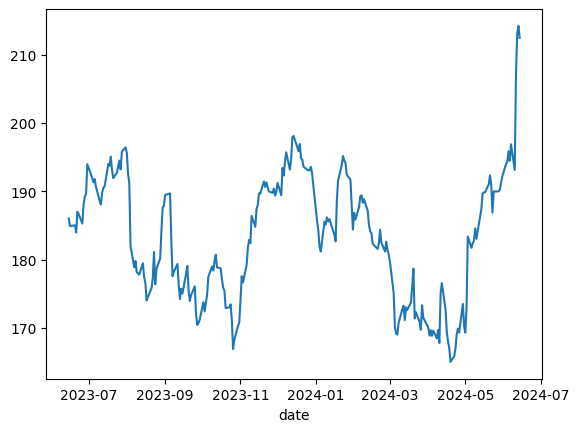

In [4]:
df.close.plot()

Calculates the percentage change of the closing prices and stores it in 'returns'

In [5]:
returns = df.close.pct_change()
returns.name = "return"

Plots the returns as a bar chart with a title, no grid, and no x-ticks

<Axes: title={'center': 'AAPL returns'}, xlabel='date'>

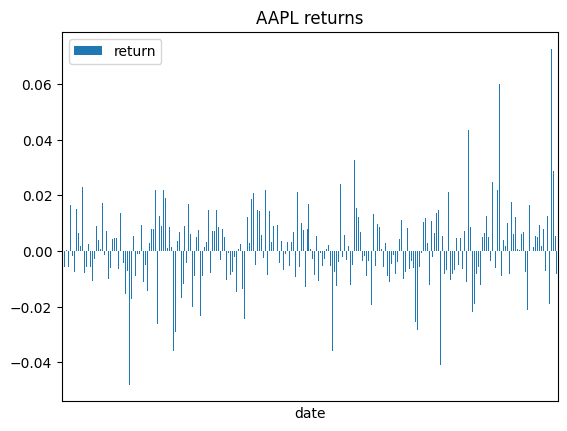

In [6]:
returns.plot.bar(title="AAPL returns", grid=False, legend=True, xticks=[])

Plots the returns as a histogram with 50 bins

<Axes: ylabel='Frequency'>

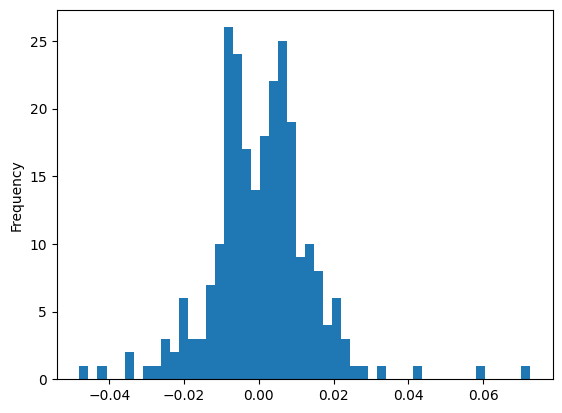

In [7]:
returns.plot.hist(bins=50)

Plots the returns as a box plot

<Axes: >

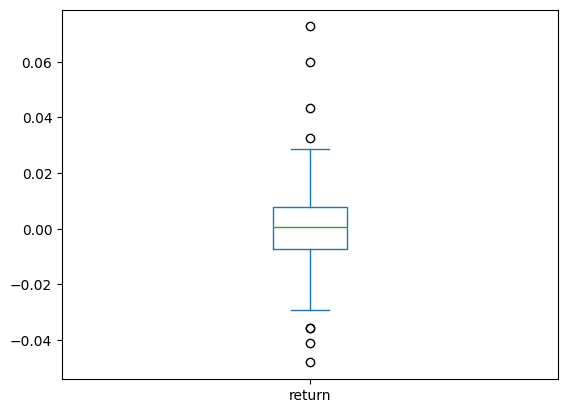

In [8]:
returns.plot.box()

Fetches historical price data for the equity "QQQ" using the "yfinance" provider and stores it in 'qqq'

In [9]:
qqq = obb.equity.price.historical("QQQ", provider="yfinance")

Calculates the percentage change of the closing prices of 'QQQ' and stores it in 'qqq_returns'

In [10]:
qqq_returns = qqq.close.pct_change()

Concatenates 'returns' and 'qqq_returns' into a DataFrame 'asset_bench' and renames the columns

In [11]:
asset_bench = pd.concat([returns, qqq_returns], axis=1)
asset_bench.columns = ["AAPL", "QQQ"]

Plots a scatter plot of 'AAPL' returns against 'QQQ' returns with a point size of 0.25

<Axes: xlabel='QQQ', ylabel='AAPL'>

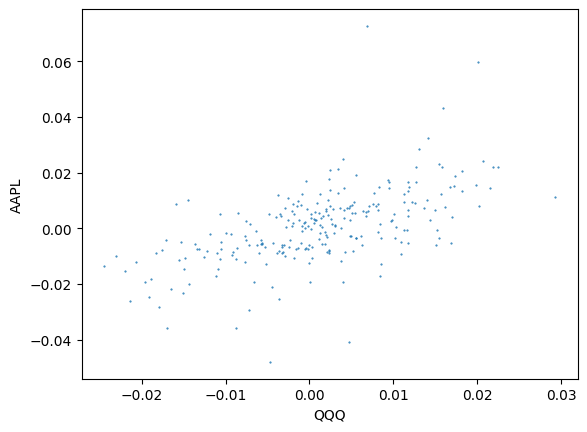

In [12]:
asset_bench.plot.scatter(x="QQQ", y="AAPL", s=0.25)

Plots a scatter matrix of 'asset_bench'

array([[<Axes: xlabel='AAPL', ylabel='AAPL'>,
        <Axes: xlabel='QQQ', ylabel='AAPL'>],
       [<Axes: xlabel='AAPL', ylabel='QQQ'>,
        <Axes: xlabel='QQQ', ylabel='QQQ'>]], dtype=object)

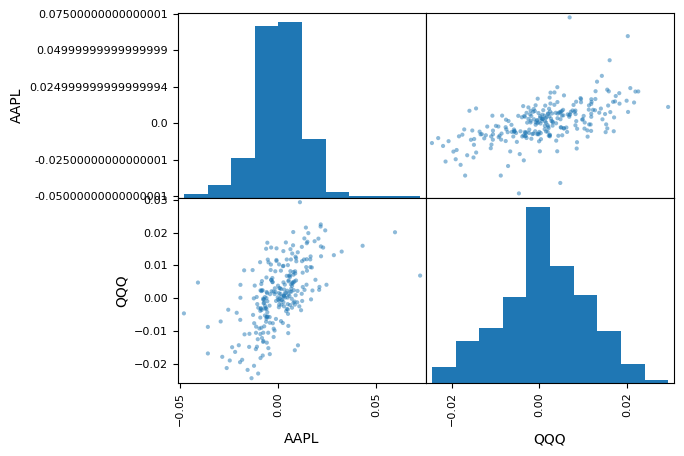

In [13]:
scatter_matrix(asset_bench)

Plots a bootstrap plot of 'returns'

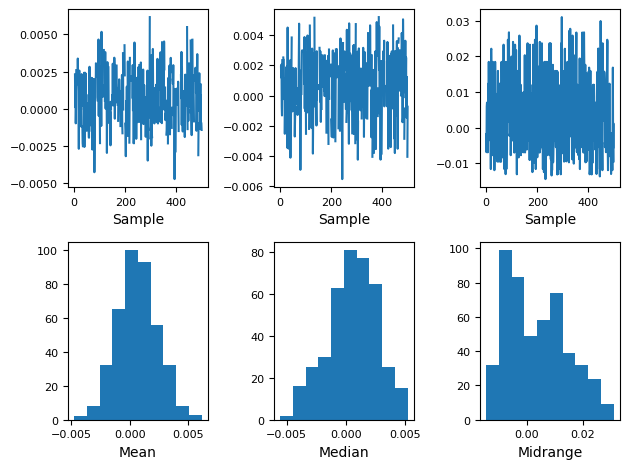

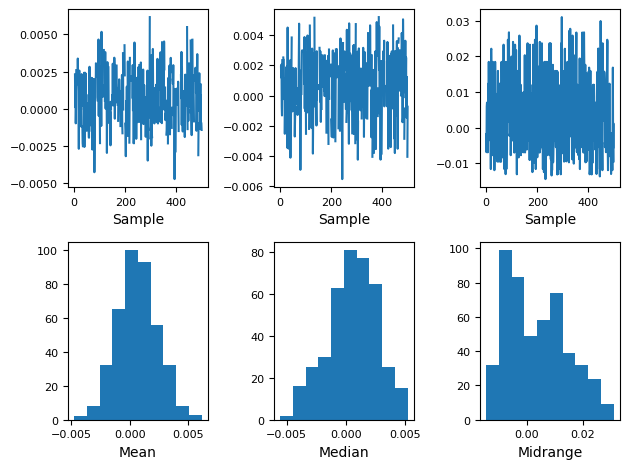

In [14]:
bootstrap_plot(returns)

**Jason Strimpel** is the founder of <a href='https://pyquantnews.com/'>PyQuant News</a> and co-founder of <a href='https://www.tradeblotter.io/'>Trade Blotter</a>. His career in algorithmic trading spans 20+ years. He previously traded for a Chicago-based hedge fund, was a risk manager at JPMorgan, and managed production risk technology for an energy derivatives trading firm in London. In Singapore, he served as APAC CIO for an agricultural trading firm and built the data science team for a global metals trading firm. Jason holds degrees in Finance and Economics and a Master's in Quantitative Finance from the Illinois Institute of Technology. His career spans America, Europe, and Asia. He shares his expertise through the <a href='https://pyquantnews.com/subscribe-to-the-pyquant-newsletter/'>PyQuant Newsletter</a>, social media, and has taught over 1,000+ algorithmic trading with Python in his popular course **<a href='https://gettingstartedwithpythonforquantfinance.com/'>Getting Started With Python for Quant Finance</a>**. All code is for educational purposes only. Nothing provided here is financial advise. Use at your own risk.

## Animating the Evolution of the Yield Curve with Matplotlib

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from openbb import obb

In [2]:
obb.user.preferences.output_type = "dataframe"

Define the maturities for the treasury rates

In [3]:
maturities = ["3m", "6m", "1y", "2y", "3y", "5y", "7y", "10y", "30y"]

Fetch treasury rates data from the Federal Reserve, drop NaN values and unnecessary columns, and rename columns

In [4]:
data = (
    obb.fixedincome.government.treasury_rates(
        start_date="1985-01-01",
        provider="federal_reserve",
    )
    .dropna(how="all")
    .drop(columns=["month_1", "year_20"])
)
data.columns = maturities

Add a column to indicate if the yield curve is inverted (30y < 3m)

In [5]:
data["inverted"] = data["30y"] < data["3m"]

Initialize figure

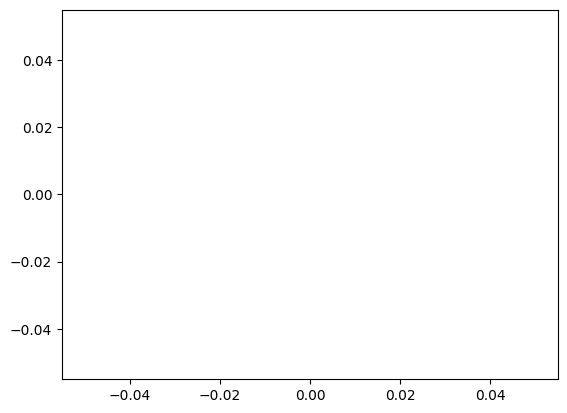

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
(line,) = ax.plot([], [])

Set the range of ticks

In [7]:
ax.set_xlim(0, 8)  # Adjusted the range to accommodate all columns
ax.set_ylim(0, 20)

(0.0, 20.0)

Set the tick locations

In [8]:
ax.set_xticks(range(9))
ax.set_yticks([2, 4, 6, 8, 10, 12, 14, 16, 18])

Set the axis labels

In [9]:
ax.set_xticklabels(maturities)
ax.set_yticklabels([2, 4, 6, 8, 10, 12, 14, 16, 18])

[Text(0, 2, '2'),
 Text(0, 4, '4'),
 Text(0, 6, '6'),
 Text(0, 8, '8'),
 Text(0, 10, '10'),
 Text(0, 12, '12'),
 Text(0, 14, '14'),
 Text(0, 16, '16'),
 Text(0, 18, '18')]

Force the y-axis labels to the left

In [10]:
ax.yaxis.set_label_position("left")
ax.yaxis.tick_left()

Add the axis labels

Text(0.5, 1.0, 'U.S. Treasury Bond Yield Curve')

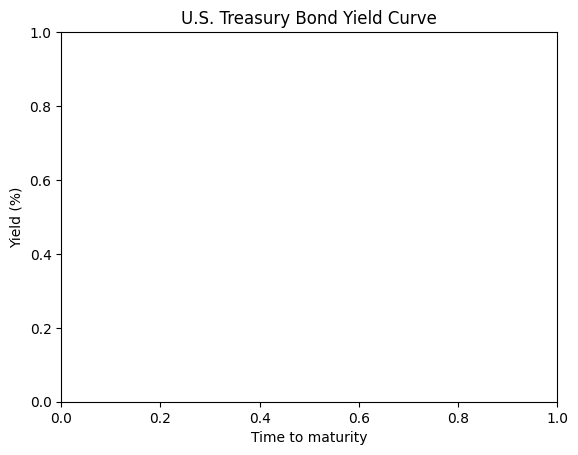

In [11]:
plt.ylabel("Yield (%)")
plt.xlabel("Time to maturity")
plt.title("U.S. Treasury Bond Yield Curve")

Initialization function for the animation

In [12]:
def init_func():
    line.set_data([], [])
    return (line,)

Animation function to update the plot for each frame

In [13]:
def animate(i):
    x = range(0, len(maturities))
    y = data[maturities].iloc[i]
    dt_ = data.index[i].strftime("%Y-%m-%d")

    if data.inverted.iloc[i]:
        line.set_color("r")
    else:
        line.set_color("y")

    line.set_data(x, y)

    plt.title(f"U.S. Treasury Bond Yield Curve ({dt_})")
    return (line,)

Create the animation

In [14]:
ani = animation.FuncAnimation(
    fig, animate, init_func=init_func, frames=len(data.index), interval=250, blit=True
)

Display the plot

In [15]:
plt.show()

**Jason Strimpel** is the founder of <a href='https://pyquantnews.com/'>PyQuant News</a> and co-founder of <a href='https://www.tradeblotter.io/'>Trade Blotter</a>. His career in algorithmic trading spans 20+ years. He previously traded for a Chicago-based hedge fund, was a risk manager at JPMorgan, and managed production risk technology for an energy derivatives trading firm in London. In Singapore, he served as APAC CIO for an agricultural trading firm and built the data science team for a global metals trading firm. Jason holds degrees in Finance and Economics and a Master's in Quantitative Finance from the Illinois Institute of Technology. His career spans America, Europe, and Asia. He shares his expertise through the <a href='https://pyquantnews.com/subscribe-to-the-pyquant-newsletter/'>PyQuant Newsletter</a>, social media, and has taught over 1,000+ algorithmic trading with Python in his popular course **<a href='https://gettingstartedwithpythonforquantfinance.com/'>Getting Started With Python for Quant Finance</a>**. All code is for educational purposes only. Nothing provided here is financial advise. Use at your own risk.

## Plotting Options Implied Volatility Surfaces with Matplotlib

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from mpl_toolkits.mplot3d import Axes3D
from openbb import obb

In [22]:
obb.user.preferences.output_type = "dataframe"

Fetches options chains for the equity "AAPL" using the "cboe" provider and stores it in 'chains'

In [23]:
chains = obb.derivatives.options.chains(
    "AAPL",
    provider="cboe",
)

Filters the options chains to include only call options

In [24]:
calls = chains[chains.option_type == "call"]

Further filters the call options to include only those with less than 90 days to expiration and strike price greater than or equal to 100

In [25]:
calls = calls[(calls.dte < 90) & (calls.strike >= 100)]

Drops duplicate rows based on 'strike' and 'dte' columns, keeping the first occurrence

In [26]:
calls.drop_duplicates(subset=["strike", "dte"], keep=False, inplace=True)

Creates a volatility surface by pivoting the data on 'strike' and 'dte' with 'implied_volatility' as values, and drops columns with all NaN values

In [27]:
vol_surface = calls.pivot(
    index="strike", columns="dte", values="implied_volatility"
).dropna(how="all", axis=1)

Generates meshgrid for 'strike' and 'dte' based on the volatility surface

In [28]:
strike, dte = np.meshgrid(vol_surface.columns, vol_surface.index)

Build the 3D plot

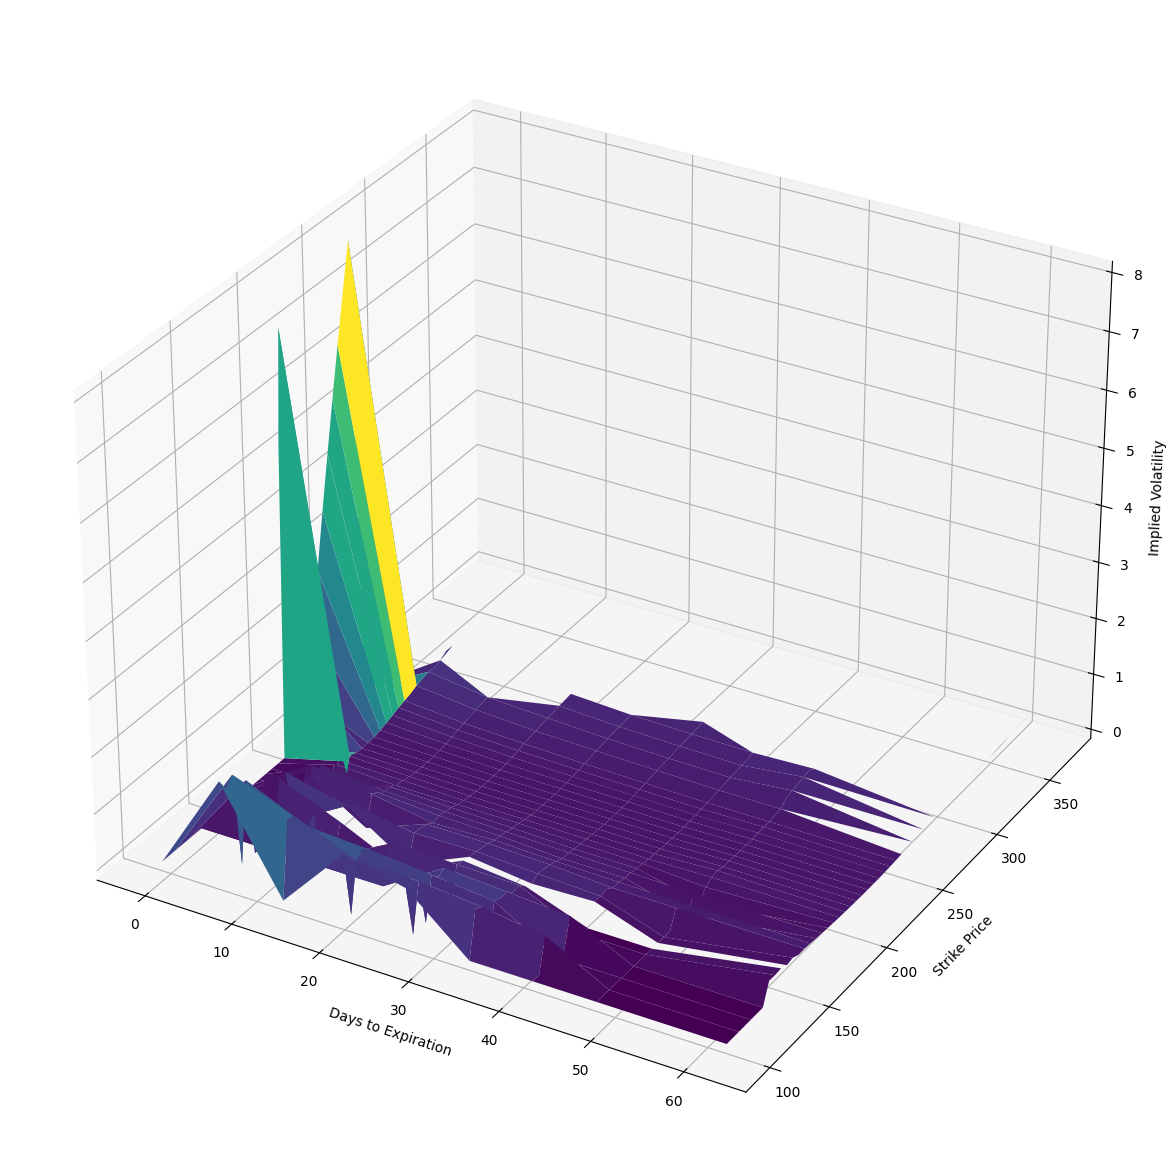

In [32]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection="3d")

ax.set_xlabel("Days to Expiration")
ax.set_ylabel("Strike Price")
ax.set_zlabel("Implied Volatility")

ax.plot_surface(strike, dte, vol_surface.values, cmap="viridis")

**Jason Strimpel** is the founder of <a href='https://pyquantnews.com/'>PyQuant News</a> and co-founder of <a href='https://www.tradeblotter.io/'>Trade Blotter</a>. His career in algorithmic trading spans 20+ years. He previously traded for a Chicago-based hedge fund, was a risk manager at JPMorgan, and managed production risk technology for an energy derivatives trading firm in London. In Singapore, he served as APAC CIO for an agricultural trading firm and built the data science team for a global metals trading firm. Jason holds degrees in Finance and Economics and a Master's in Quantitative Finance from the Illinois Institute of Technology. His career spans America, Europe, and Asia. He shares his expertise through the <a href='https://pyquantnews.com/subscribe-to-the-pyquant-newsletter/'>PyQuant Newsletter</a>, social media, and has taught over 1,000+ algorithmic trading with Python in his popular course **<a href='https://gettingstartedwithpythonforquantfinance.com/'>Getting Started With Python for Quant Finance</a>**. All code is for educational purposes only. Nothing provided here is financial advise. Use at your own risk.

## Visualizing Statistical Relationships with Seaborn

In [1]:
import warnings

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from openbb import obb

In [3]:
warnings.filterwarnings("ignore")
obb.user.preferences.output_type = "dataframe"

Fetches historical price data for "AAPL" and "SPY" starting from 2020-01-01 using the "yfinance" provider and pivots the data

In [4]:
data = obb.equity.price.historical(
    ["AAPL", "SPY"], start_date="2020-01-01", provider="yfinance"
).pivot(columns="symbol", values="close")

Calculates the percentage change in prices and drops any NaN values

In [5]:
returns = data.pct_change(fill_method=None).dropna()

Resets the index of 'returns'

In [6]:
returns = returns.reset_index()

Melts the 'returns' DataFrame for easy plotting

In [7]:
melted = pd.melt(
    returns,
    id_vars=["date"],
    value_vars=["AAPL"],
    var_name="stock",
    value_name="returns",
)

Adds a 'month' column to the melted DataFrame

In [8]:
melted["month"] = pd.to_datetime(melted.date).dt.to_period("M")

Creates a boxplot of returns by month

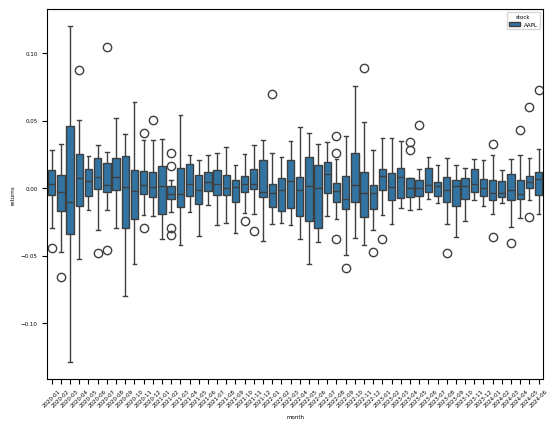

In [20]:
g = sns.boxplot(x="month", y="returns", hue="stock", data=melted)
g.set_xticklabels(melted["month"].unique(), rotation=45);

Creates a jointplot of "SPY" returns versus "AAPL" returns with a regression line

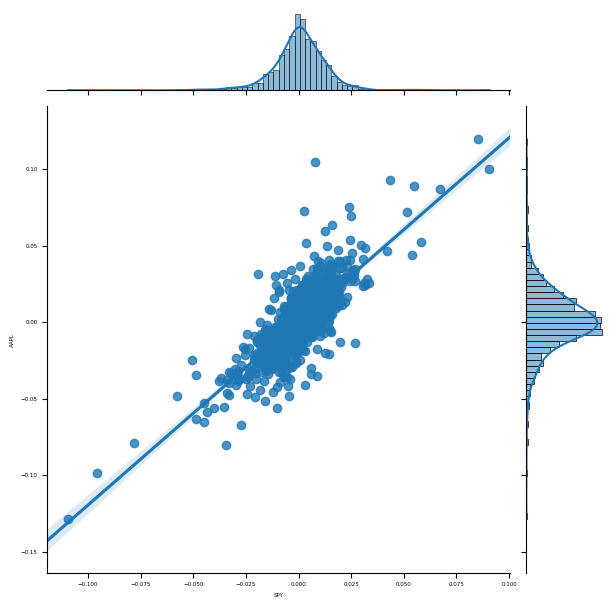

In [21]:
g = sns.jointplot(
    x="SPY",
    y="AAPL",
    data=returns,
    kind="reg",
    truncate=False,
)

Fetches the Dow Jones Industrial Average data from Wikipedia

In [22]:
dji = pd.read_html("https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average")[1]

Fetches historical price data for the DJI components starting from 2020-01-01 using the "yfinance" provider and pivots the data

In [23]:
dji_data = (
    obb.equity.price.historical(
        dji.Symbol, start_date="2020-01-01", provider="yfinance"
    )
).pivot(columns="symbol", values="close")

Calculates the percentage change in prices and drops any NaN values for the DJI data

In [24]:
dji_returns = dji_data.pct_change(fill_method=None).dropna()

Computes the correlation matrix for the DJI returns

In [25]:
corr = dji_returns.corr()

Generates a mask for the upper triangle of the correlation matrix

In [26]:
mask = np.triu(np.ones_like(corr, dtype=bool))

Generates a custom diverging colormap

In [27]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)

Draws the heatmap with the mask and correct aspect ratio

<Axes: xlabel='symbol', ylabel='symbol'>

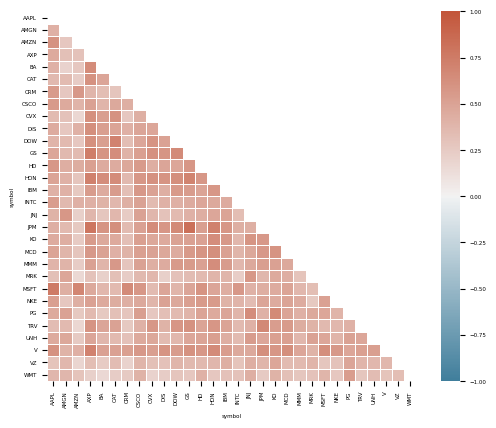

In [28]:
plt.rcParams["font.size"] = 4
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    vmin=-1.0,
    vmax=1.0,
    center=0,
    square=True,
    linewidths=0.5,
)

**Jason Strimpel** is the founder of <a href='https://pyquantnews.com/'>PyQuant News</a> and co-founder of <a href='https://www.tradeblotter.io/'>Trade Blotter</a>. His career in algorithmic trading spans 20+ years. He previously traded for a Chicago-based hedge fund, was a risk manager at JPMorgan, and managed production risk technology for an energy derivatives trading firm in London. In Singapore, he served as APAC CIO for an agricultural trading firm and built the data science team for a global metals trading firm. Jason holds degrees in Finance and Economics and a Master's in Quantitative Finance from the Illinois Institute of Technology. His career spans America, Europe, and Asia. He shares his expertise through the <a href='https://pyquantnews.com/subscribe-to-the-pyquant-newsletter/'>PyQuant Newsletter</a>, social media, and has taught over 1,000+ algorithmic trading with Python in his popular course **<a href='https://gettingstartedwithpythonforquantfinance.com/'>Getting Started With Python for Quant Finance</a>**. All code is for educational purposes only. Nothing provided here is financial advise. Use at your own risk.